In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
df=pd.read_csv('fd - Copy.csv',parse_dates=[0],index_col=[0])

In [27]:
df.head()

,Total(USD in million)
End of Financial Year,
1950-51,2161
1951-52,1815
1952-53,1850
1953-54,1911
1954-55,1873


In [28]:
df.columns=['Total']

c:\users\sharm\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='End of Financial Year'>

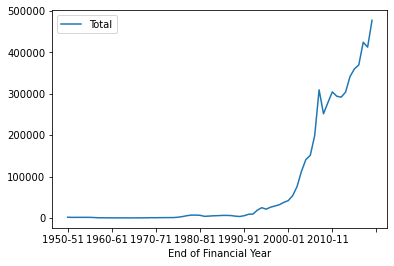

In [29]:
df.plot()

In [30]:
df['valcheck']=df['Total'].rolling(window=10).mean()

c:\users\sharm\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='End of Financial Year'>

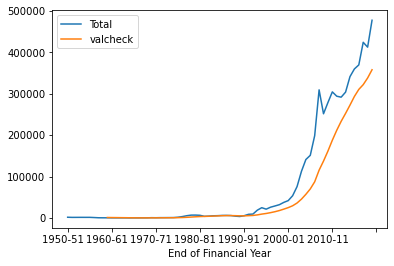

In [31]:
df.plot()

c:\users\sharm\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='End of Financial Year'>

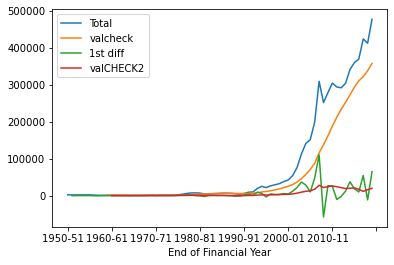

In [32]:
df['1st diff']=df['Total']-df['Total'].shift(1)
df['valCHECK2']=df['1st diff'].rolling(window=10).mean()
df.plot()

In [33]:
from statsmodels.tsa.stattools import adfuller

In [34]:
adfuller(df['Total'].dropna())

(1.226850248829967,
 0.996166243009132,
 11,
 58,
 {'1%': -3.548493559596539,
  '5%': -2.912836594776334,
  '10%': -2.594129155766944},
 1316.7924409367695)

In [35]:
adfuller(df['1st diff'].dropna())

(-0.5615429151160451,
 0.879437157291699,
 9,
 59,
 {'1%': -3.5463945337644063,
  '5%': -2.911939409384601,
  '10%': -2.5936515282964665},
 1295.2014244582097)

In [36]:
df['newLog']=np.log(df['Total'])

c:\users\sharm\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='End of Financial Year'>

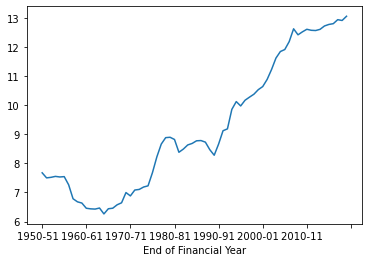

In [37]:
df['newLog'].plot()

c:\users\sharm\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


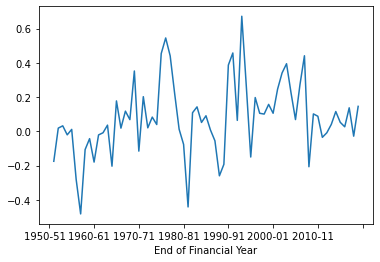

In [38]:
df['val']=df['newLog']-df['newLog'].shift(1)
df['val'].plot()
df['test1']=df['newLog'].rolling(window=20).mean()

In [39]:
df['val_trend']=df['val'].rolling(window=10).mean()

c:\users\sharm\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='End of Financial Year'>

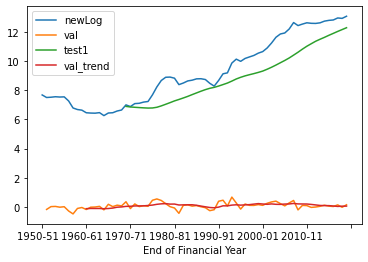

In [40]:
df[['newLog','val','test1','val_trend']].plot()

In [41]:
adfuller(df['val'].dropna())

(-5.629366578045453,
 1.098480342014879e-06,
 0,
 68,
 {'1%': -3.530398990560757,
  '5%': -2.9050874099328317,
  '10%': -2.5900010121107266},
 -18.81646977124558)

In [42]:
df

,Total,valcheck,1st diff,valCHECK2,newLog,val,test1,val_trend
End of Financial Year,,,,,,,,
1950-51,2161,NaN,NaN,NaN,7.678326,NaN,NaN,NaN
1951-52,1815,NaN,-346.0,NaN,7.503841,-0.174486,NaN,NaN
1952-53,1850,NaN,35.0,NaN,7.522941,0.019100,NaN,NaN
1953-54,1911,NaN,61.0,NaN,7.555382,0.032441,NaN,NaN
1954-55,1873,NaN,-38.0,NaN,7.535297,-0.020085,NaN,NaN
...,...,...,...,...,...,...,...,...
2015-16,360176,293724.3,18538.0,20855.4,12.794348,0.052841,11.770358,0.086520
2016-17,369955,310801.9,9779.0,17077.6,12.821137,0.026789,11.902315,0.061918
2017-18,424545,322284.1,54590.0,11482.2,12.958773,0.137637,12.035872,0.031534


In [43]:
df.drop(['valcheck','1st diff','valCHECK2','test1','val_trend'],axis=1,inplace=True)


In [44]:
df

,Total,newLog,val
End of Financial Year,,,
1950-51,2161,7.678326,NaN
1951-52,1815,7.503841,-0.174486
1952-53,1850,7.522941,0.019100
1953-54,1911,7.555382,0.032441
1954-55,1873,7.535297,-0.020085
...,...,...,...
2015-16,360176,12.794348,0.052841
2016-17,369955,12.821137,0.026789
2017-18,424545,12.958773,0.137637


In [45]:
df=df.dropna()

c:\users\sharm\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='End of Financial Year'>

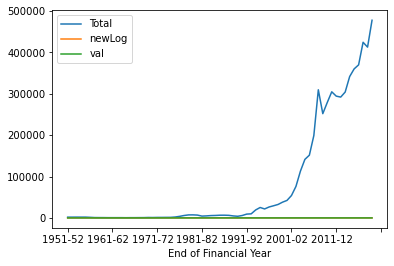

In [46]:
df.plot()

c:\users\sharm\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='End of Financial Year'>

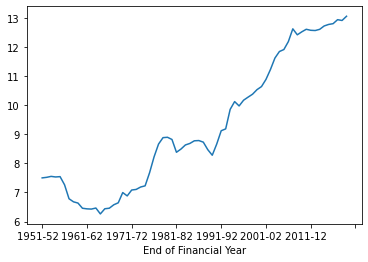

In [47]:
df['newLog'].plot()

In [48]:
#d=1= difference shift was 1
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


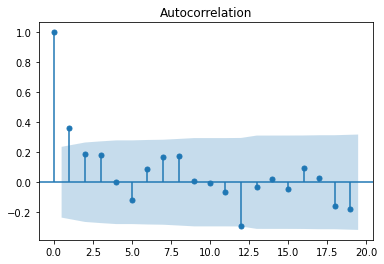

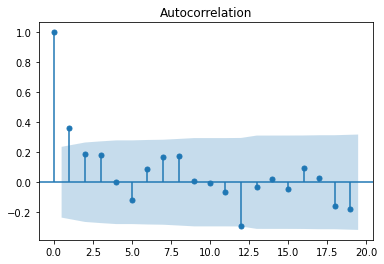

In [69]:
plot_acf(df['val']) #q=1-4

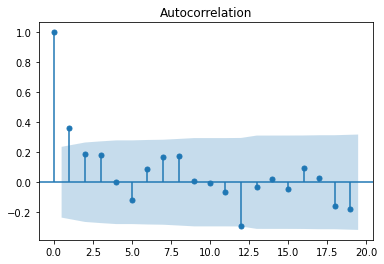

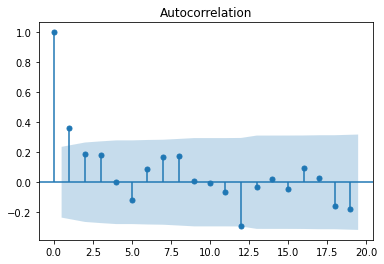

In [50]:
plot_acf(df['val'].dropna())

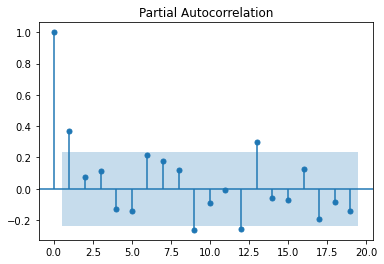

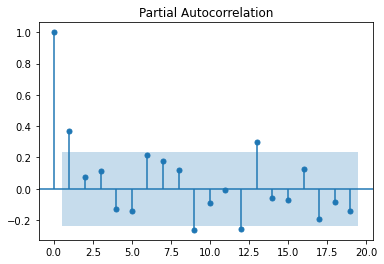

In [71]:
plot_pacf(df['val'].dropna()) #p=1

In [52]:
from statsmodels.tsa.arima_model import ARIMA
train=df[0:60]
test=df[60:]


In [53]:
import warnings
warnings.filterwarnings('ignore')
for i in range(1,2):
    for j in range(1,5):
        try:
            model=ARIMA(train['newLog'],order=(i,1,j))
            result=model.fit()
            print(f'order {i,1,j}, value:{result.aic}')
        except:
            print("NAN")

order (1, 1, 1), value:-8.82689073693777
order (1, 1, 2), value:-5.398656868762259
order (1, 1, 3), value:-7.2681590229311155
order (1, 1, 4), value:-13.81191318663872


In [54]:
model=ARIMA(train['newLog'],order=(1,1,4))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.newLog   No. Observations:                   59
Model:                 ARIMA(1, 1, 4)   Log Likelihood                  13.906
Method:                       css-mle   S.D. of innovations              0.182
Date:                Tue, 10 Nov 2020   AIC                            -13.812
Time:                        23:50:48   BIC                              0.731
Sample:                             1   HQIC                            -8.135
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0775      0.061      1.265      0.206      -0.043       0.197
ar.L1.D.newLog    -0.5919      0.133     -4.437      0.000      -0.853      -0.330
ma.L1.D.newLog     1.1799      0.148      7.989      0.000       0.890       1.469
ma.L2.D.newLog     0.6965      0.191      3.656      0.000       0.323       1.070
ma.L3.D.newLog     0.6340      0.208      3.052      0.002       0.227       1.041
ma.L4.D.newLog     0.6874      0.145      4.729      0.000       0.403       0.972
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6896           +0.0000j            1.6896            0.5000
MA.1           -0.8736           -0.4867j            1.0000           -0.4191
MA.2           -0.8736           +0.4867j            1.0000            0.4191
MA.3            0.4125           -1.1333j            1.2061           -0.1944
MA.4            0.4125           +1.1333j            1.2061            0.1944
-----------------------------------------------------------------------------
"""

In [55]:
test.index

Index(['2011-12   ', '2012-13   ', '2013-14   ', '2014-15   ', '2015-16   ',
       '2016-17   ', '2017-18   ', '2018-19   ', '2019-20   '],
      dtype='object', name='End of Financial Year')

In [56]:
test['predicted']=result.forecast(steps=9)[0]

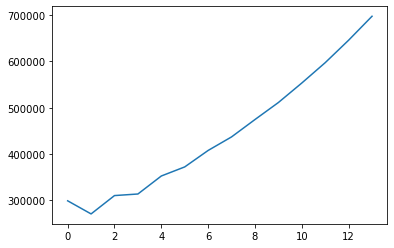

In [57]:
resu,se,cf=result.forecast(steps=14)
resu
newVal=abs(np.exp(resu))
plt.plot(newVal)

In [58]:
lower_series = pd.Series(cf[:, 0])


upper_series = pd.Series(cf[:, 1])
lower_series
lower_bound=abs(np.exp(lower_series))
lower_bound=lower_bound
lower_bound

0     209304.822993
1     138657.635384
2     118679.061249
3      87382.691316
4      69696.603374
5      58117.692785
6      50417.401624
7      44389.019434
8      39927.784655
9      36262.470894
10     33355.166496
11     30911.233737
12     28887.266644
13     27158.117188
dtype: float64

In [59]:
upper_series
upper_bound=abs(np.exp(upper_series))
upper_bound=upper_bound
upper_bound

0     4.268386e+05
1     5.281410e+05
2     8.108734e+05
3     1.125491e+06
4     1.782636e+06
5     2.382223e+06
6     3.295925e+06
7     4.299930e+06
8     5.635576e+06
9     7.203543e+06
10    9.174617e+06
11    1.153559e+07
12    1.442917e+07
13    1.790685e+07
dtype: float64

In [60]:
test['predicted']

End of Financial Year
2011-12       12.607854
2012-13       12.508441
2013-14       12.645023
2014-15       12.655891
2015-16       12.772755
2016-17       12.826885
2017-18       12.918145
2018-19       12.987428
2019-20       13.069719
Name: predicted, dtype: float64

In [61]:
test['newLog']

End of Financial Year
2011-12       12.592688
2012-13       12.584667
2013-14       12.625516
2014-15       12.741507
2015-16       12.794348
2016-17       12.821137
2017-18       12.958773
2018-19       12.930890
2019-20       13.076962
Name: newLog, dtype: float64

<AxesSubplot:xlabel='End of Financial Year'>

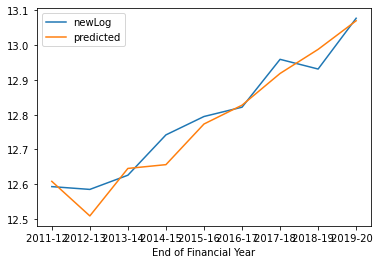

In [62]:
test[['newLog','predicted']].plot()

In [63]:
test['Predicted']=abs(np.exp(test['predicted']))
test['Predicted']=test['Predicted']
test['Predicted']

End of Financial Year
2011-12       298896.928296
2012-13       270611.871967
2013-14       310215.563876
2014-15       313605.599905
2015-16       352482.200529
2016-17       372087.745226
2017-18       407641.981144
2018-19       436886.350311
2019-20       474358.562425
Name: Predicted, dtype: float64

In [64]:
resu=abs(np.exp(resu))
resu=resu
resu

array([298896.92829575, 270611.87196694, 310215.5638764 , 313605.59990469,
       352482.20052938, 372087.74522557, 407641.98114381, 436886.35031114,
       474358.5624249 , 511095.16510866, 553191.54338628, 597142.74377132,
       645615.47782971, 697363.89905671])

In [65]:
test['Actual']=test['Total']
test['Total']

End of Financial Year
2011-12       294398
2012-13       292046
2013-14       304223
2014-15       341638
2015-16       360176
2016-17       369955
2017-18       424545
2018-19       412871
2019-20       477807
Name: Total, dtype: int64

<AxesSubplot:xlabel='End of Financial Year'>

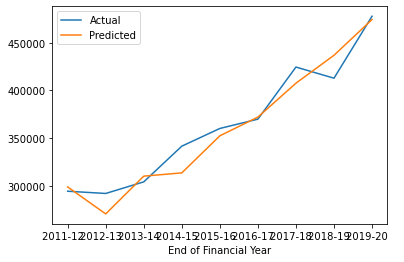

In [66]:
test[['Actual','Predicted']].plot()

In [73]:
error= np.mean(np.abs(test['Predicted'] - test['Actual'])/np.abs(test['Actual']))

In [74]:
accu=100-(error*100)
accu

96.41388767636865

In [75]:
test

,Total,newLog,val,predicted,Predicted,Actual
End of Financial Year,,,,,,
2011-12,294398,12.592688,-0.034782,12.607854,298896.928296,294398
2012-13,292046,12.584667,-0.008021,12.508441,270611.871967,292046
2013-14,304223,12.625516,0.040850,12.645023,310215.563876,304223
2014-15,341638,12.741507,0.115991,12.655891,313605.599905,341638
2015-16,360176,12.794348,0.052841,12.772755,352482.200529,360176
2016-17,369955,12.821137,0.026789,12.826885,372087.745226,369955
2017-18,424545,12.958773,0.137637,12.918145,407641.981144,424545
2018-19,412871,12.930890,-0.027883,12.987428,436886.350311,412871
2019-20,477807,13.076962,0.146072,13.069719,474358.562425,477807


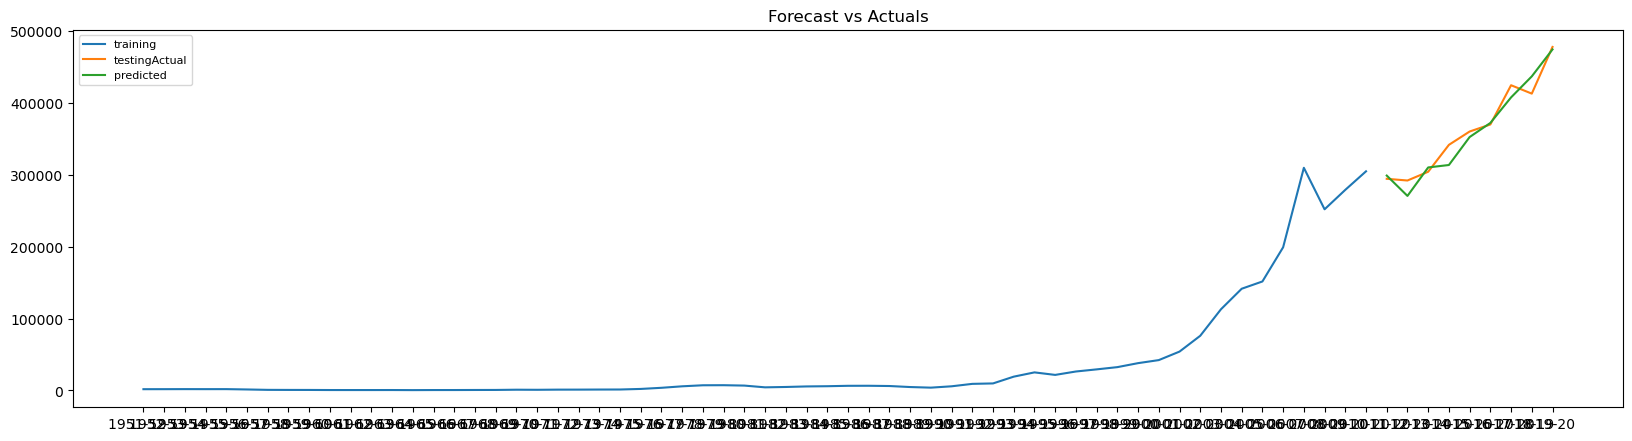

In [79]:
plt.figure(figsize=(20,5),dpi=100)
plt.plot(train['Total'],label='training')
plt.plot(test['Actual'],label='testingActual')
plt.plot(test['Predicted'],label='predicted')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()